<h1> Week 4 Homework

<h2>Question 7.1</h2>
Describe a situation or problem from your job, everyday life, current events, etc., for which exponential
smoothing would be appropriate. What data would you need? Would you expect the value of α (the
first smoothing parameter) to be closer to 0 or 1, and why?

<h2>Answr 7.1</h2>

Predicitng the oil price (e.g. Brent crude price in USD/BBL) in short-term is very important to the oil and gas industry.

The historical oil price versus time would be needed as data input (see chart below as an example) for building the model. 

Oil price exhibits a trend as well as a seasonality component (for example seasons; summer and winter affects petroleum consumption and thus its price) thus a triple exponential smoothing model would be required.

A value of alpha closer to 0 would be probably more appropriate to account for random market price fluctuations.


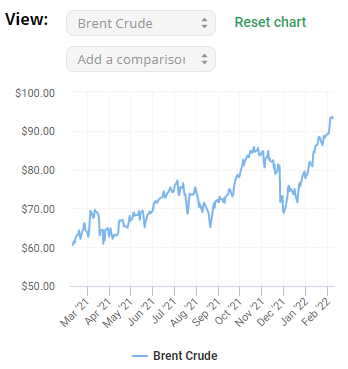

<p><p style="page-break-after:always;"></p></p>

<h2>Question 7.2</h2>
Using the 20 years of daily high temperature data for Atlanta (July through October) from Question 6.2
(file temps.txt), build and use an exponential smoothing model to help make a judgment of whether
the unofficial end of summer has gotten later over the 20 years. (Part of the point of this assignment is
for you to think about how you might use exponential smoothing to answer this question. Feel free to
combine it with other models if you’d like to. There’s certainly more than one reasonable approach.) 

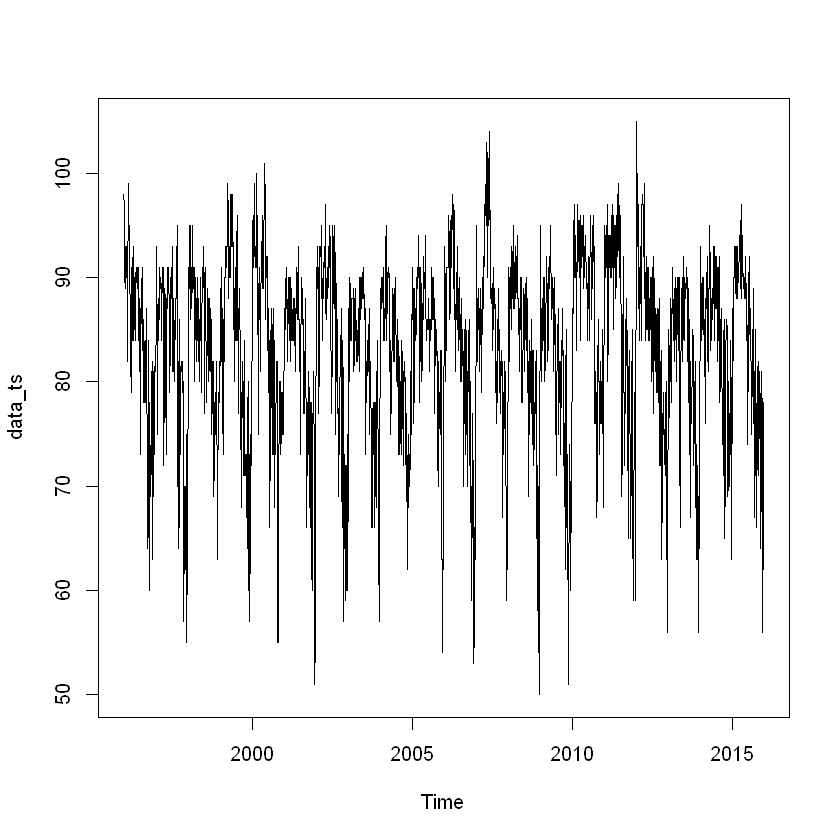

In [1]:
# loading the dataset
# READ DATASET as DataFrame
df <- as.data.frame(read.table("temps.txt", header = TRUE, sep = "\t", , stringsAsFactors=FALSE))
# Convert data to time series
data_vec <- as.vector(unlist(df[,2:21]))
data_ts <- ts(data = data_vec, frequency=123, start=1996)
plot(data_ts)

<p><p style="page-break-after:always;"></p></p>

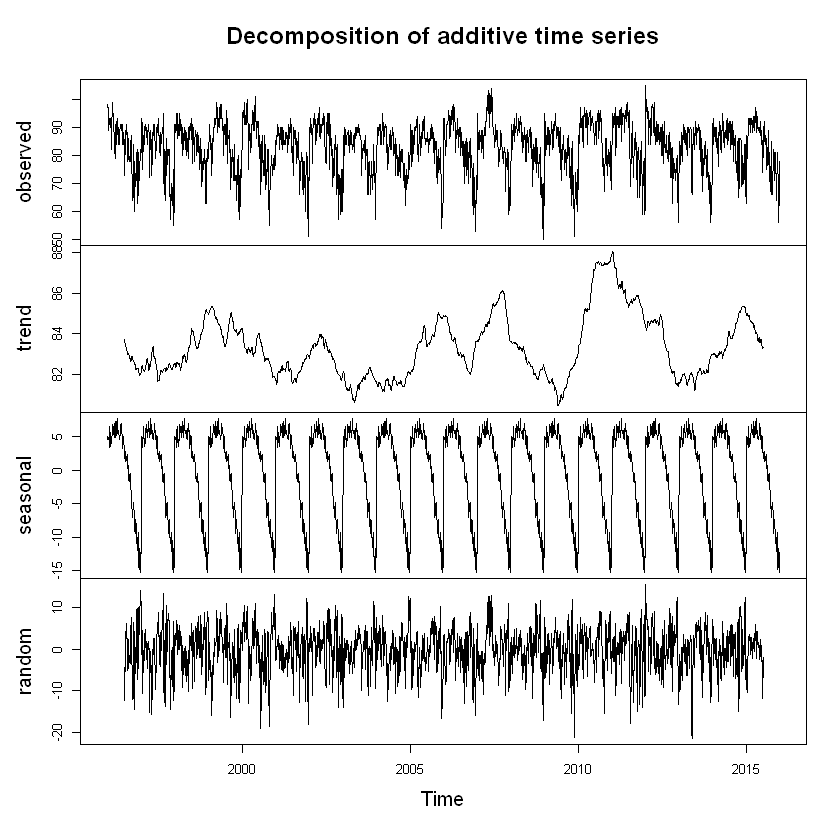

In [2]:
# Decompose the data for indepth analsyis
plot(decompose(data_ts, type="additive"))

<p><p style="page-break-after:always;"></p></p>

### <b> Conclusions from the Decomposition and further work Assumptions: </b> 

1. Holt-Winters function will be used for exponential smoothing
2. After merging the data, the data exhibits a seasonal component (representing each year), thus Holt-Winters with trend and season will be needed (The triple Holt-Winters method).
3. Holt-Winters built-in optimized will be allowed to determine the optimum values for alpha, beta and gamma.
4. Judging by the plot of the time series data and the decomposition plot, the amplitude of the seasonal activity appears to be fairly constant (roughly the same size peaks and troughs throughout the time series) thus Additive seasonality should be more representative of the data. However both types of seasonality will be tested.

In [3]:
# Using Holt Winters to smooth the data with additive seasonality
data_ts_HW_add <- HoltWinters(data_ts, alpha=NULL, beta=NULL, gamma=NULL, seasonal="additive", start.periods=2)
# Using Holt Winters to smooth the data with multiplicative seasonality
data_ts_HW_mult <- HoltWinters(data_ts, alpha=NULL, beta=NULL, gamma=NULL, seasonal="multiplicative", start.periods=2)
# Summary of the models
"Holt-Winters exponential smoothing with trend and additive seasonal component."
cat("optimum alpha:", round(data_ts_HW_add$alpha, 4), "\t")
cat("optimum beta:", round(data_ts_HW_add$beta, 4), "\n")
cat("optimum gamma:", round(data_ts_HW_add$gamma, 4), "\t")
cat("Final sum of squared errors:", data_ts_HW_add$SSE)
"Holt-Winters exponential smoothing with trend and multiplicative seasonal component."
cat("optimum alpha:", round(data_ts_HW_mult$alpha, 4), "\t")
cat("optimum beta:", round(data_ts_HW_mult$beta, 4), "\n")
cat("optimum gamma:", round(data_ts_HW_mult$gamma, 4), "\t")
cat("Final sum of squared errors:", data_ts_HW_mult$SSE)

[1] "Holt-Winters exponential smoothing with trend and additive seasonal component."

optimum alpha: 0.6611 	optimum beta: 0 
optimum gamma: 0.6248 	Final sum of squared errors: 66244.25

[1] "Holt-Winters exponential smoothing with trend and multiplicative seasonal component."

optimum alpha: 0.615 	optimum beta: 0 
optimum gamma: 0.5495 	Final sum of squared errors: 68904.57



<b> Conclusions: </b>

1. For both models, the beta (trend factor) is 0. This means that the data has no increasing nor decreasing slope (trend) over time. This could be also infered from the Tmperature plot above which shows the temperature fluctuating within the same range with no trend of increase nor decrease.
2. The final sum of squared errors of the additive Holt-Winters model is lower than that of the multiplicative model as expected from the decomposition analysis.

As a result, Holt-Winters exponential smoothing with trend and additive seasonal component will be used for the analysis.

<p><p style="page-break-after:always;"></p></p>

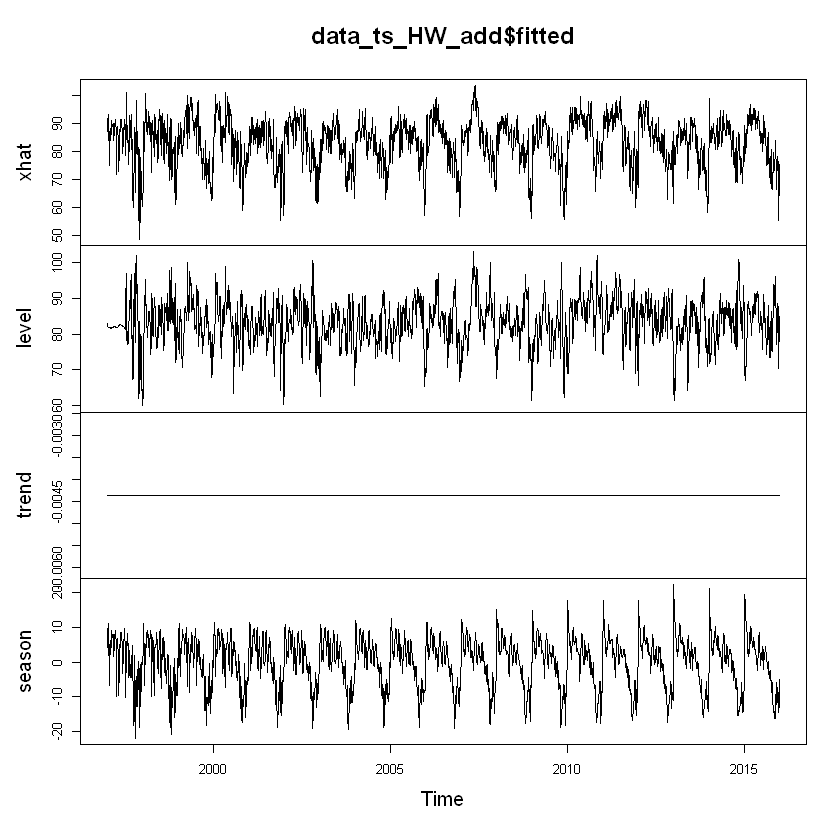

In [4]:
# plot results
plot(data_ts_HW_add$fitted)

<p><p style="page-break-after:always;"></p></p>

In order to analyze if  whether the unofficial end of summer has gotten later over the 20 years, the Holt-Winters model seasonal factors will be used for the analysis.

In [5]:
# reconvert data to dataframe
season_matrix <- matrix(data_ts_HW_add$fitted[,4], nrow=123)
season_df <- as.data.frame(season_matrix)
colnames(season_df) <- colnames(df[3:ncol(df)])
head(season_df)

,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.303159,4.054077,9.349191,8.130519,9.261932,8.532675,10.833750,10.596553,9.559008,9.526730,12.454249,15.18901,15.052357,17.963213,17.946705,17.796582,22.385105,21.31072,19.45438
2,8.238119,8.168393,8.457426,7.810603,8.686298,9.197265,9.837370,11.663073,10.874704,10.162519,11.021049,10.13469,11.583196,12.246533,12.817176,14.277046,14.037278,16.07719,17.19256
3,11.091777,11.100059,11.213419,11.470326,11.416575,11.012491,10.210645,12.021948,12.738520,11.468041,11.483482,10.45074,11.722773,11.707197,11.803979,12.726046,14.244787,12.98723,12.74993
4,9.042997,9.057058,9.529053,10.185524,10.863856,10.209557,10.532285,10.867244,11.779117,11.552601,11.117308,11.69283,11.650082,12.084663,12.461996,12.000781,12.458283,12.62307,11.98537
5,2.067387,2.067912,3.708913,5.588420,7.004562,8.024549,9.444664,8.518818,9.749682,10.738920,10.552850,11.29192,10.939712,8.908885,10.345553,10.214813,11.172561,12.77225,12.94898
6,2.116168,2.106939,2.232254,3.394700,4.340175,5.462823,6.487578,7.648008,8.250531,7.421824,6.156207,7.12694,6.619883,8.329696,9.151988,9.361362,9.444097,10.35325,11.13812


<p><p style="page-break-after:always;"></p></p>

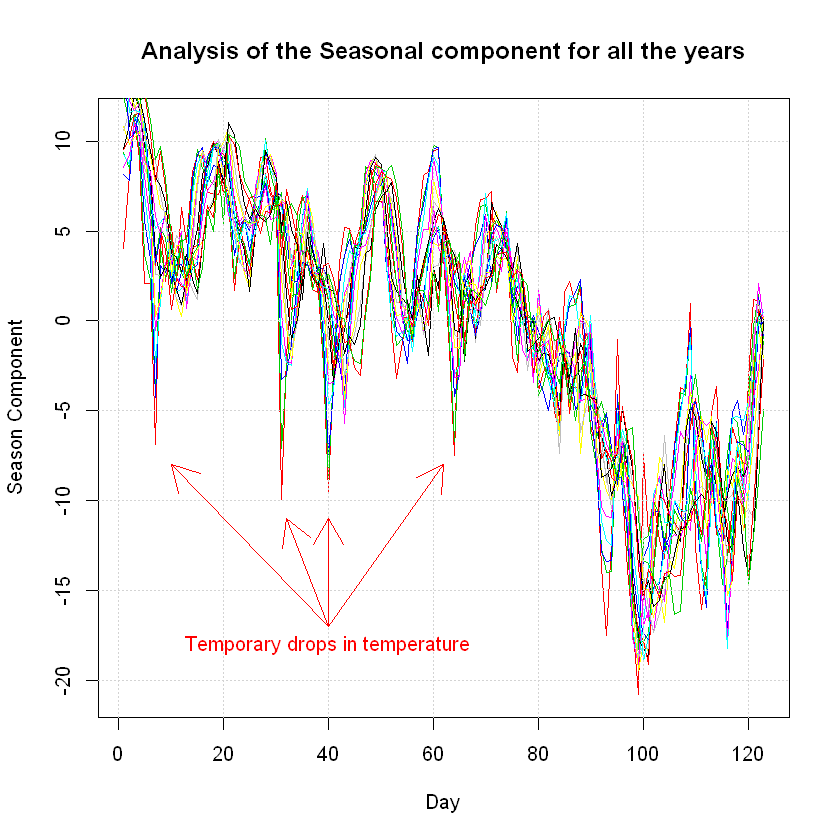

In [6]:
# Plot the results
plot(season_df[,2], col=2, type="l", ylab="Season Component", xlab="Day")
for (col in seq(3, ncol(season_df))) {
    lines(season_df[,col], col=col)
}
title("Analysis of the Seasonal component for all the years")
grid()
arrows(40, -17, 10, -8, col = "red")
arrows(40, -17, 32, -11, col = "red")
arrows(40, -17, 40, -11, col = "red")
arrows(40, -17, 62, -8, col = "red")
text(40, -18, "Temporary drops in temperature", col="red")

Note the apparent seasonal drops in temperature indicated by the arrows.
<p><p style="page-break-after:always;"></p></p>

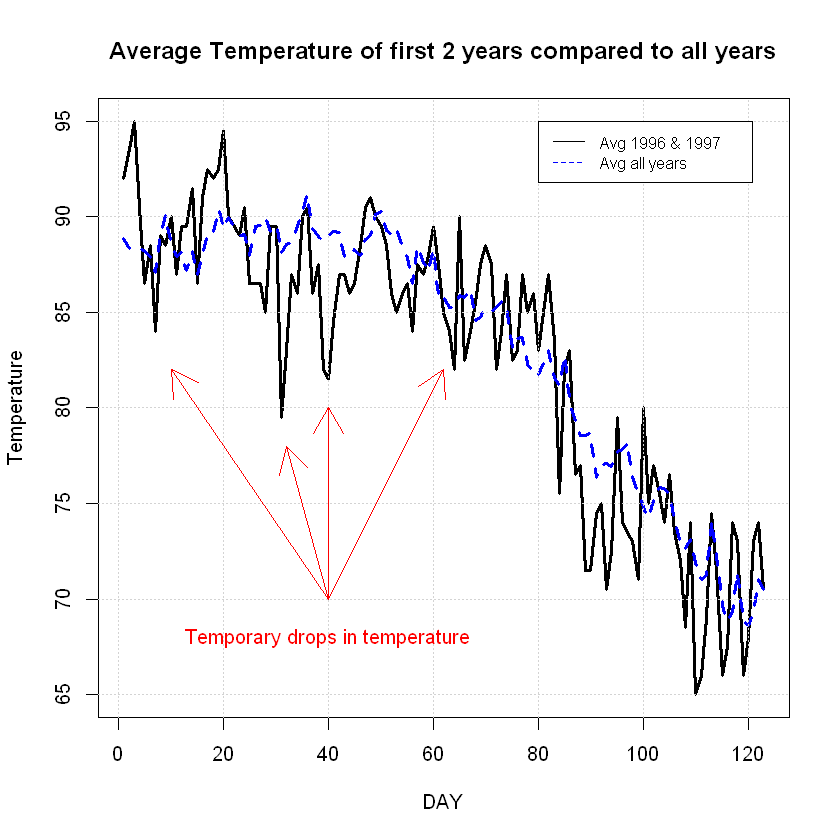

In [7]:
plot(rowMeans(df[,c("X1996", "X1997")]), type="l", col="black", lwd=3, xlab="DAY", ylab="Temperature")
lines(rowMeans(df[,2:ncol(df)]), col="blue", , lty=2, lwd=3)
grid()
title("Average Temperature of first 2 years compared to all years")
arrows(40, 70, 10, 82, col = "red")
arrows(40, 70, 32, 78, col = "red")
arrows(40, 70, 40, 80, col = "red")
arrows(40, 70, 62, 82, col = "red")
text(40, 68, "Temporary drops in temperature", col="red")
legend(80,95, legend=c("Avg 1996 & 1997", "Avg all years"), col=c("black", "blue"), lty=1:2, cex=0.8)

From both graphs above, It's clear that building the Holt-Winters model using the first 2 periods (1996 and 1997) causes the model to exihibit temproray drops in temperature that would significantly affect the detection of the unofficial end of summer by Cusum technique. These drops are not evident in other years or in the average of all the years.

As a result, A sensitivity analysis was done to determine the optimum number of periods using an elbow diagram.
<p><p style="page-break-after:always;"></p></p>

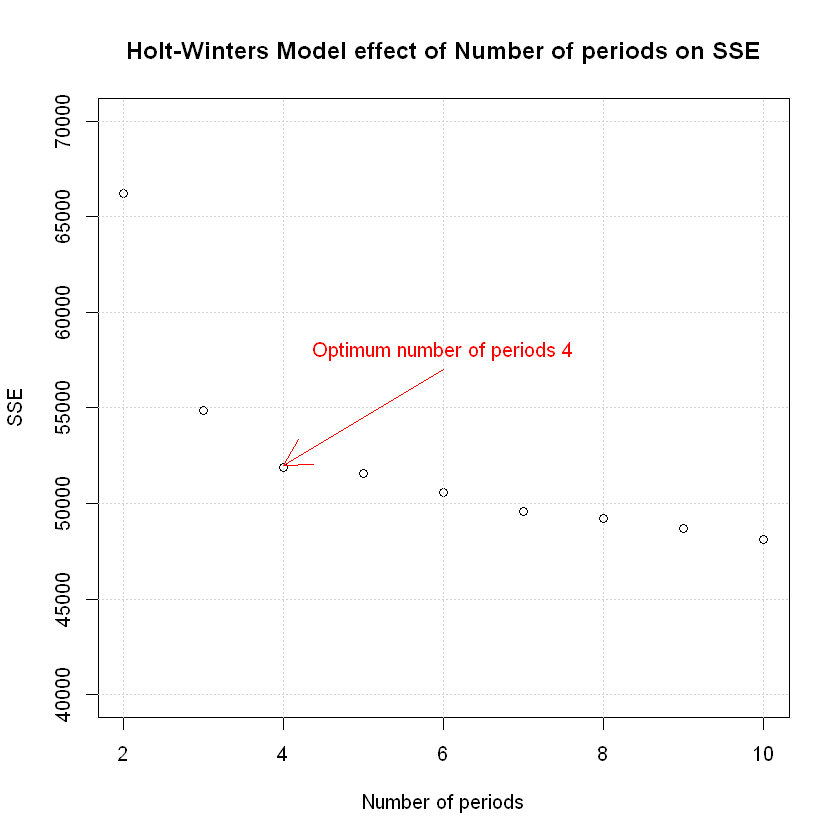

In [8]:
SSE_results <- seq(1,9)
for (n in seq(2,10)) {
    # Using Holt Winters to smooth the data with additive seasonality
    sen_model <- HoltWinters(data_ts, alpha=NULL, beta=NULL, gamma=NULL, seasonal="additive", start.periods=n)
    SSE_results[n-1] <- sen_model$SSE
}
plot(seq(2,10), SSE_results, xlab="Number of periods", ylab="SSE", ylim = c(40000, 70000))
title("Holt-Winters Model effect of Number of periods on SSE")
grid()
arrows(6, 57000, 4, 52000, col = "red")
text(6, 58000, "Optimum number of periods 4", col="red")

From the graph above, The optimum number of periods was selected to be 4.

<p><p style="page-break-after:always;"></p></p>

In [9]:
# Using Holt Winters to smooth the data with additive seasonality
final_model <- HoltWinters(data_ts, alpha=NULL, beta=NULL, gamma=NULL, seasonal="additive", start.periods=4)
# Summary of the model
"Final Holt-Winters exponential smoothing with trend and additive seasonal component."
cat("optimum alpha:", round(final_model$alpha, 4), "\t")
cat("optimum beta:", round(final_model$beta, 4), "\n")
cat("optimum gamma:", round(final_model$gamma, 4), "\t")
cat("Final sum of squared errors:", final_model$SSE)

[1] "Final Holt-Winters exponential smoothing with trend and additive seasonal component."

optimum alpha: 0.775 	optimum beta: 0 
optimum gamma: 0.3966 	Final sum of squared errors: 51912.04

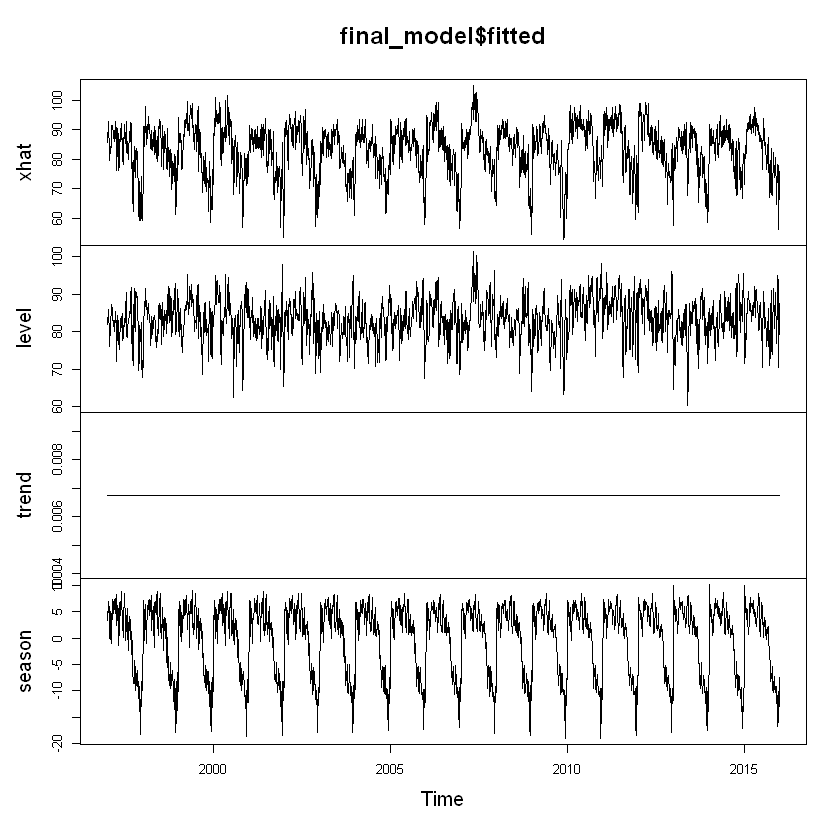

In [10]:
# plot results
plot(final_model$fitted)

<p><p style="page-break-after:always;"></p></p>

In [11]:
# reconvert data to dataframe
season_matrix <- matrix(final_model$fitted[,4], nrow=123)
season_df <- as.data.frame(season_matrix)
colnames(season_df) <- colnames(df[3:ncol(df)])

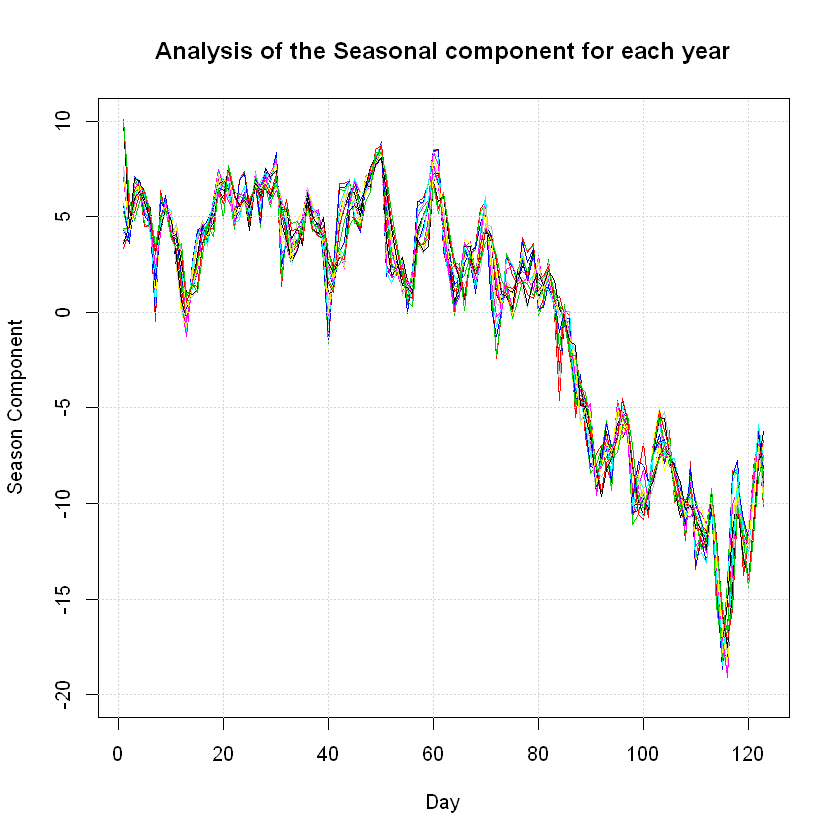

In [12]:
# Plot the results
plot(season_df[,2], col=2, type="l", ylab="Season Component", xlab="Day", ylim=c(-20,10))
for (col in seq(3, ncol(season_df))) {
    lines(season_df[,col], col=col)
}
title("Analysis of the Seasonal component for each year")
grid()

Comparison of the above chart using periods = 4 with the previous chart using periods = 2 shows that a much better trend from all the years seasonal factors was obtained. 
Visually, it is clear that the unofficial end of summer starts at slightly after Day 80 (Middle to late of September)

<p><p style="page-break-after:always;"></p></p>

<b> A cussum approach will be used to detect the unofficial end of summer </b>
1. Critical value will be assumed C = 0.5  x standard deviation 
2. Threshold will be based on a sensitivity analysis

In [13]:
sd_data <- round(sd(as.matrix(season_df[,])),3)
cat("Standard deviation of seasonal factors:", sd_data)

Standard deviation of seasonal factors: 6.5

In [14]:
C <- 0.5* sd_data
# vector of sensitivity variables
k_sen <- c(0.5, 0.75, 1, 2, 3, 4, 5) 
# dataframe to store results data
result_df <- data.frame()
# loop through all years
for (col in colnames(season_df)[2:length(season_df)]){
    # Counter for the loops
    counter <- 1
    # loop through the sentivity
    for (k in k_sen) {
        # number of observations
        N <- nrow(season_df)
        # initialize CuSum Metric St
        S_T <- seq(1,N)
        S_T[1] <- 0
        # loop for all points
        col_mean <- mean(season_df[1:80,col])
        for (i in 2:N){
            S_T[i] <- max(0, S_T[i-1]+(col_mean-season_df[i,col]-C))
        }
        # add S_T to dataframe
        season_df$S_T <- S_T
        result_df[counter, "k_used"] <- k
        result_df[counter, col] <- as.integer(rownames(df[season_df$S_T>k*sd_data,][1,]))
        # counter
        counter <- counter + 1
    }
}
# remove useless S_T columns
result_df$S_T <- NULL
season_df$S_T <- NULL

<p><p style="page-break-after:always;"></p></p>

In [15]:
# show reults
result_df

,k_used,X1998,X1999,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0.50,72,73,73,84,84,84,84,84,84,85,86,86,86,86,86,86,86,86
2,0.75,84,84,84,84,85,85,84,86,86,86,86,87,87,87,87,87,87,86
3,1.00,84,85,85,86,86,86,86,86,86,87,87,87,87,87,87,87,87,87
4,2.00,87,87,87,88,87,87,87,88,88,88,88,88,88,88,88,89,89,88
5,3.00,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,90,90,90
6,4.00,89,90,90,90,90,90,90,90,90,90,90,90,91,90,90,91,91,91
7,5.00,90,90,90,90,91,91,91,91,91,91,91,91,91,91,91,91,91,91


From the table above, The results converges at K = 0.75 x SD. With unofficial end of summer converging around days 84-87 (22 to 25th of September)

It can be also seen that with k < 3*SD, There is a trend of increase in the end of summer day (summer becoming longer)

In [16]:
cat("Minimum detected end of summer", df[84,"DAY"], "\n")
cat("Maximum detected end of summer", df[87,"DAY"], "\n")

Minimum detected end of summer 22-Sep 
Maximum detected end of summer 25-Sep 


<p><p style="page-break-after:always;"></p></p>

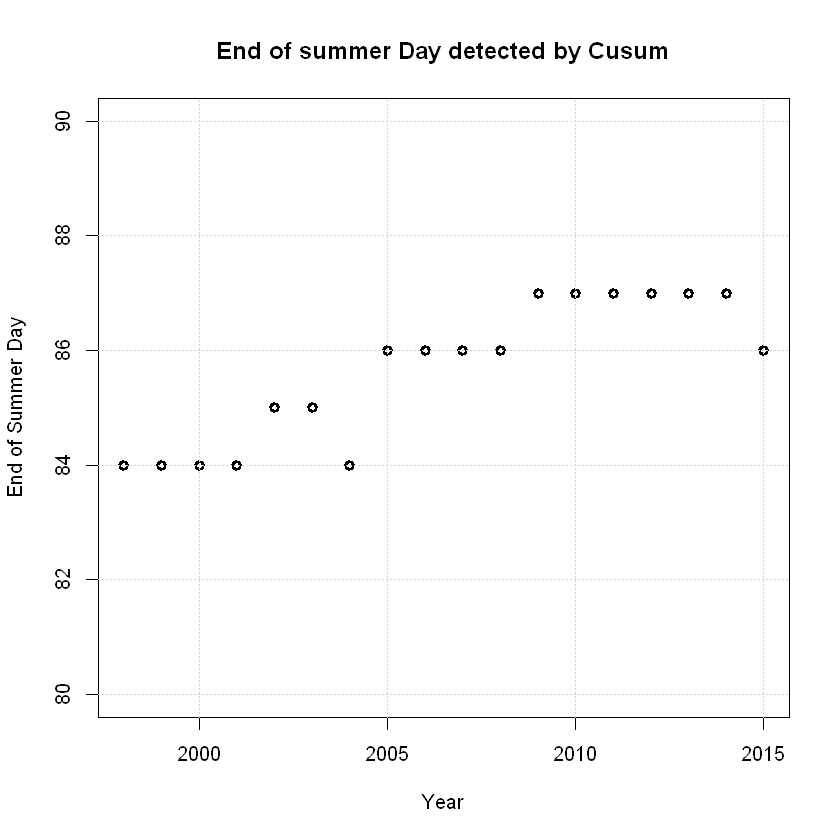

In [17]:
plot(seq(1998,2015), t(result_df[2,2:ncol(result_df)]), xlab="Year", ylab="End of Summer Day", lwd=3, ylim=c(80,90))
title("End of summer Day detected by Cusum")
grid()

<b> From the chart above, it can be concluded that the unofficial end of summer has gotten later over the last 20 years </b>